<a href="https://colab.research.google.com/github/Celine96/AIFFEL_Projects_Lists/blob/main/%5BEX_5%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [17]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	


In [20]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/aiffel/가위바위보/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path =  '/content/drive/MyDrive/aiffel/가위바위보/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path =  '/content/drive/MyDrive/aiffel/가위바위보/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [28]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/aiffel/가위바위보'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


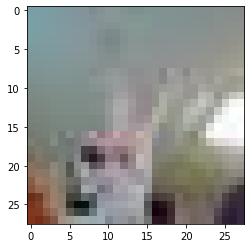

In [29]:
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

라벨:  0


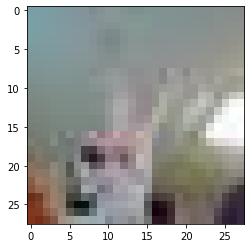

In [30]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model = keras.models.Sequential()
#16 = 얼마나 다양한 이미지의 특징을 살펴볼 것 인가
#input shape = 입력 이미지의 형태
 
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

#분류기 알고리즘을 얼마나 복잡하게 할 것인가?
#복잡한 문제일수록 이 수를 늘려보자 
model.add(keras.layers.Dense(32,activation = 'relu'))
model.add(keras.layers.Dense(32,activation = 'relu'))

#최종 분류기의 클래스의 수
#여기서는 가위,바위,보까지 총 3개의 클래스를 구분하므로 3
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [36]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 30ms/step - loss: 15.6365 - accuracy: 0.3733
Epoch 2/10
10/10 [==============================] - 0s 32ms/step - loss: 3.3837 - accuracy: 0.4700
Epoch 3/10
10/10 [==============================] - 0s 34ms/step - loss: 1.3152 - accuracy: 0.4733
Epoch 4/10
10/10 [==============================] - 0s 32ms/step - loss: 0.6782 - accuracy: 0.5667
Epoch 5/10
10/10 [==============================] - 0s 33ms/step - loss: 0.5780 - accuracy: 0.6800
Epoch 6/10
10/10 [==============================] - 0s 31ms/step - loss: 1.0334 - accuracy: 0.6500
Epoch 7/10
10/10 [==============================] - 0s 30ms/step - loss: 0.8733 - accuracy: 0.6333
Epoch 8/10
10/10 [==============================] - 0s 29ms/step - loss: 0.7711 - accuracy: 0.6767
Epoch 9/10
10/10 [==============================] - 0s 30ms/step - loss: 0.4882 - accuracy: 0.7000
Epoch 10/10
10/10 [==============================] - 0s 29ms/step - loss: 0.5919 - accuracy: 0.6667


In [37]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

# 내맘대로 코드 변경

def load_data2(img_path, number_of_data=32):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0

    
    for file in glob.iglob(img_path+'/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/aiffel/가위바위보/test'
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_test shape: (32, 28, 28, 3)
y_test shape: (32,)


In [38]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

1/1 - 0s - loss: 1.0965 - accuracy: 0.0000e+00 - 109ms/epoch - 109ms/step
test_loss: 1.0965262651443481
test_accuracy: 0.0


## 수업내용 

### 언제 검증용 데이터(validation set)를 사용하나요?

머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때

### 픽셀의 'min/max`가 의미가 있는 짓?
- 0~255의 흑백
- pixel intensity는 의학 분야에서 상당히 중요하게 사용되고 있습니다. 

- https://elecs.tistory.com/309

In [10]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


### 딥러닝 네트워크 설계하기

#### sequential model 
- 케라스에서 모델을 만드는 방법
- Sequential API 
- Functional API
- 밑바닥부터 직접 코딩




In [11]:
model = keras.models.Sequential()
#16 = 얼마나 다양한 이미지의 특징을 살펴볼 것 인가
#input shape = 입력 이미지의 형태
 
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))

model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

#분류기 알고리즘을 얼마나 복잡하게 할 것인가?
#복잡한 문제일수록 이 수를 늘려보자 
model.add(keras.layers.Dense(32,activation = 'relu'))

#최종 분류기의 클래스의 수
#여기서는 0~9까지 총 10개의 클래스를 구분하므로 10
model.add(keras.layers.Dense(10, activation = 'softmax'))

### Conv2D 
input

레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다. 여기서는 16과 32를 사용했습니다. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻입니다. 우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다. 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다. 그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.


### Dense 

레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자 입니다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있습니다. 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.

### 마지막 Dense 레이어

뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 됩니다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

### 더 좋은 네트워크 만들기 
3번째 스텝 딥러닝 네트워크 설계하기에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것인데요. Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나, Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 횟수인 epoch 값을 변경해 볼 수 있을 겁니다.

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")